<a href="https://colab.research.google.com/github/enino84/enino84.github.io/blob/main/courses/intro_data_assimilation/DA_ENDJ_Forecasts_and_Numerical_Models_Duffing_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

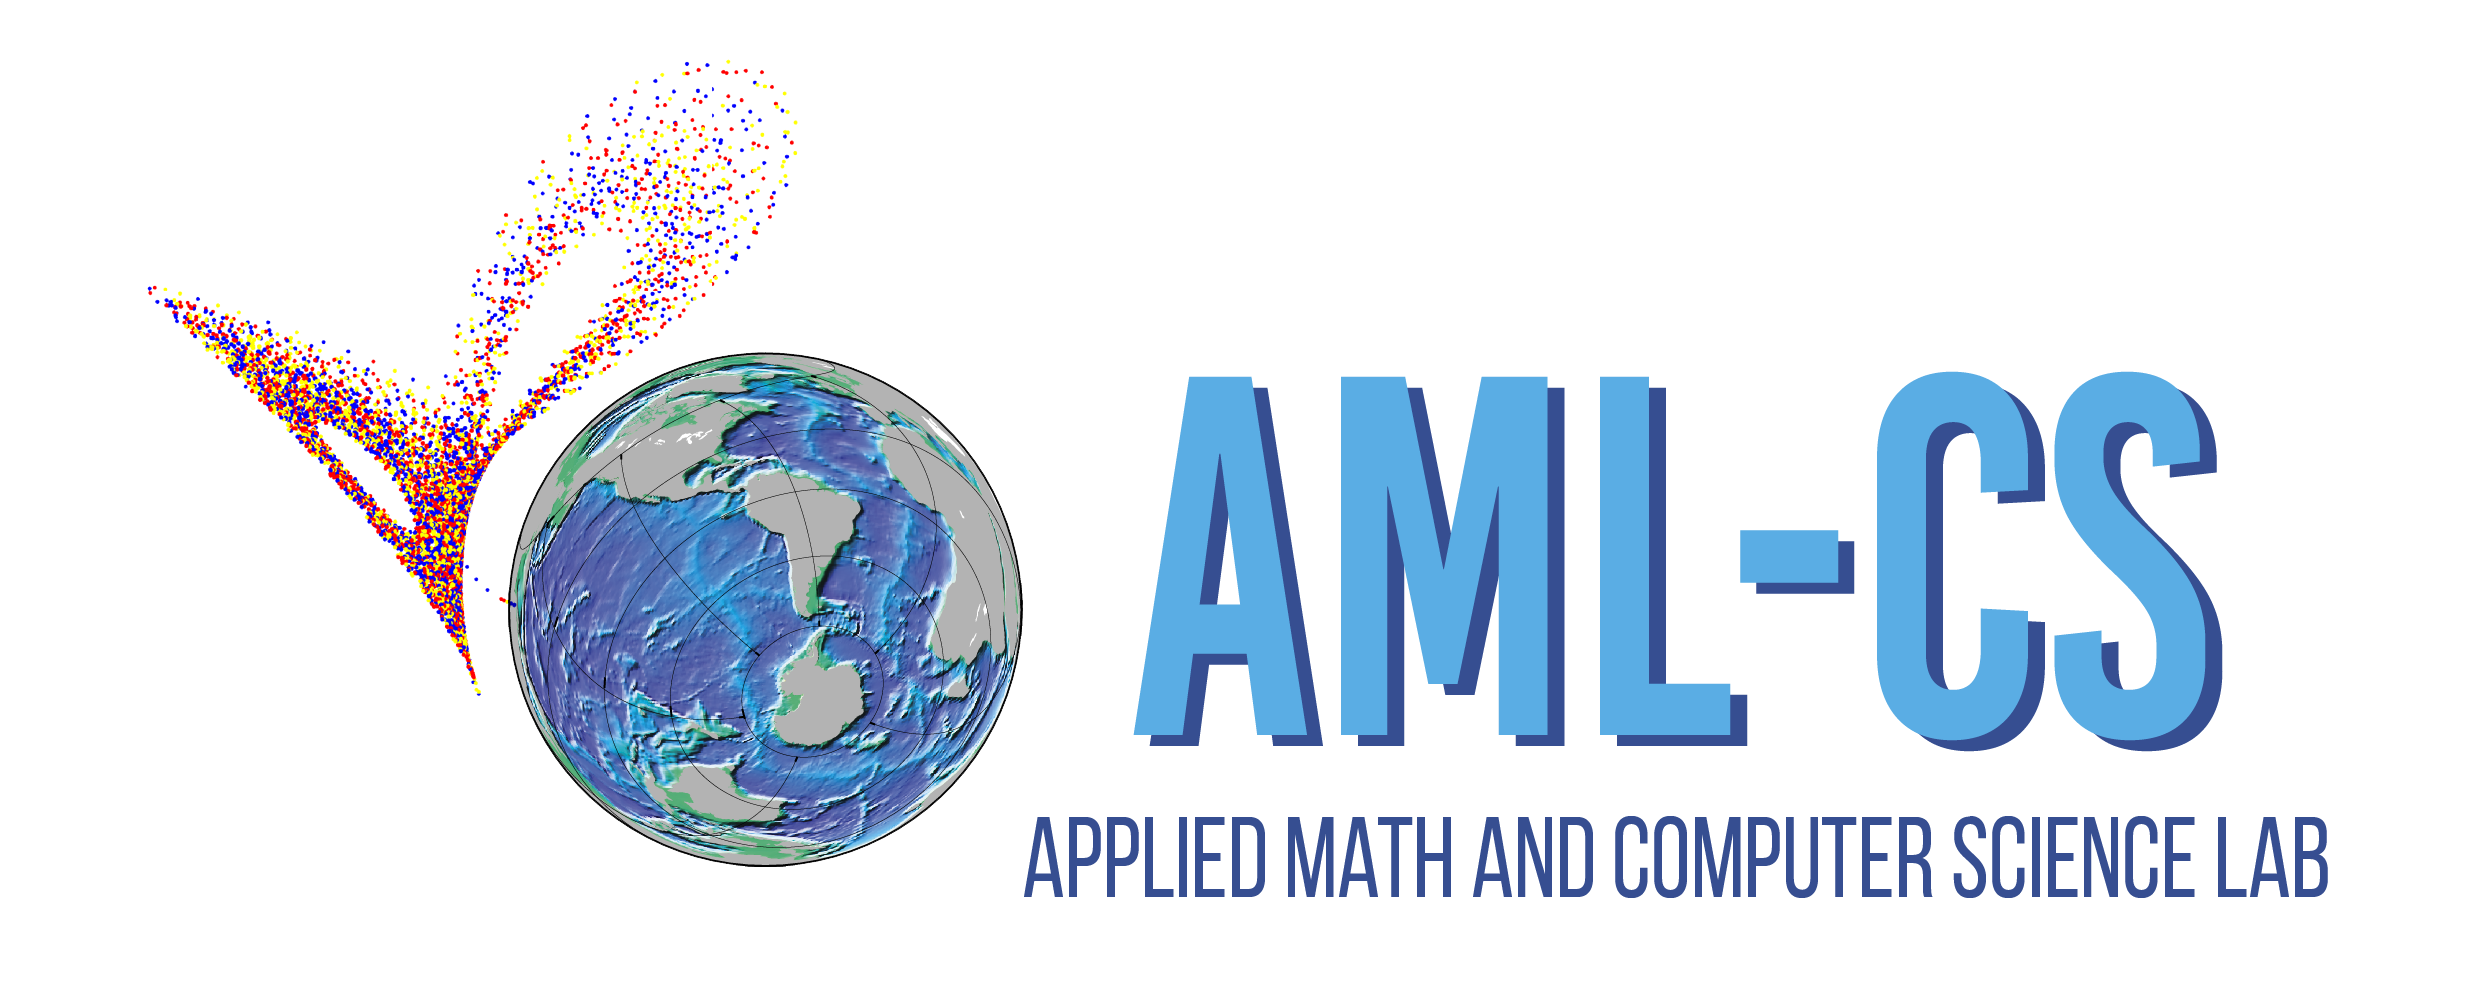

# Instructor

**Elías D. Nino-Ruiz, Ph.D.**  
enino@uninorte.edu.co - elias.d.nino@gmail.com  
https://enino84.github.io/ - https://aml-cs.github.io/

# Forecasts and Numerical Models - Duffing Equation

Duffing Equation

\begin{eqnarray}
x''+\delta x' + \alpha x +\beta x^3= \gamma \cos(\omega t)
\end{eqnarray}

this is equivalent to

\begin{eqnarray}
x''=-\delta x' - \alpha x -\beta x^3+ \gamma \cos(\omega t)
\end{eqnarray}

https://numpy.org/

In [ ]:
import numpy as np

In [ ]:
#(alpha, beta, delta, gamma, omega)
def f(x, t, args=(1, 5, 0.02, 8, 0.65)):
  alpha = args[0];
  beta = args[1];
  delta = args[2];
  gamma = args[3];
  omega = args[4];
  return (x[1], -delta*x[1] - alpha*x[0] - beta * x[0]**3 + gamma * np.cos(omega * t))

In [ ]:
from scipy.integrate import odeint

Initial condition $x'(0) = 1$ and $x(0) = 0$, $t \in [0,\, 200]$, and the sample size equals 200

In [ ]:
x0 = np.array([1, 0], dtype=np.float32);
t = np.linspace(0,200, 1000);

x_samples = [];
samples = 200;
for i in range(0, samples):
  xi = x0 + 0.1*np.random.randn(2,); #perturbation ~ 0.1
  xs = odeint(f, xi, t);
  x_samples.append(xs);


In [ ]:
import matplotlib.pyplot as plt

At the outset of numerical integration, small perturbations are typically not amplified. This means that even if there are slight errors or variations in the initial conditions or parameters, the numerical method will generally produce reasonably accurate results. However, as the integration progresses and the system evolves, these small perturbations can accumulate and grow in magnitude, potentially leading to significant deviations from the true solution. Therefore, it is important to carefully monitor and control for numerical errors throughout the integration process to ensure the accuracy and reliability of the results.

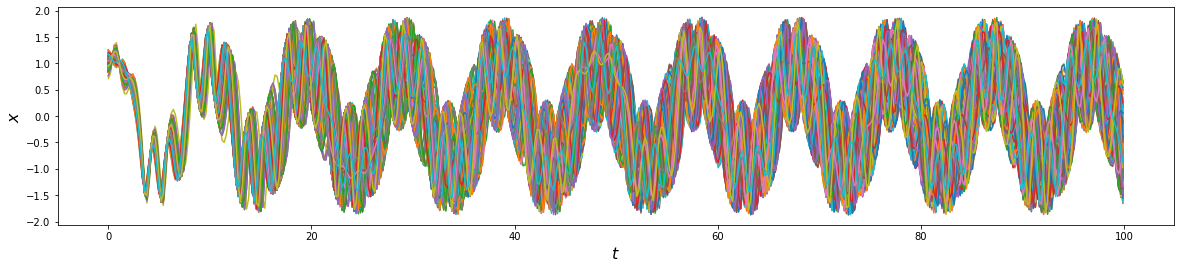

In [ ]:
plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(t[:500], x[:500,0], '-');

plt.xlabel('$t$', fontdict={'size':16});
plt.ylabel('$x$', fontdict={'size':16});


Towards the end of the integration process, small perturbations that may have been initially insignificant can become amplified by the non-linear dynamics of the system. As the system evolves, even small variations in initial conditions or parameters can lead to significant differences in the final outcome. These amplified perturbations can affect the accuracy and reliability of the numerical results, and may lead to errors or deviations from the true solution. To mitigate these effects, it is important to carefully consider the numerical methods used and to implement strategies for controlling and minimizing errors throughout the integration process.

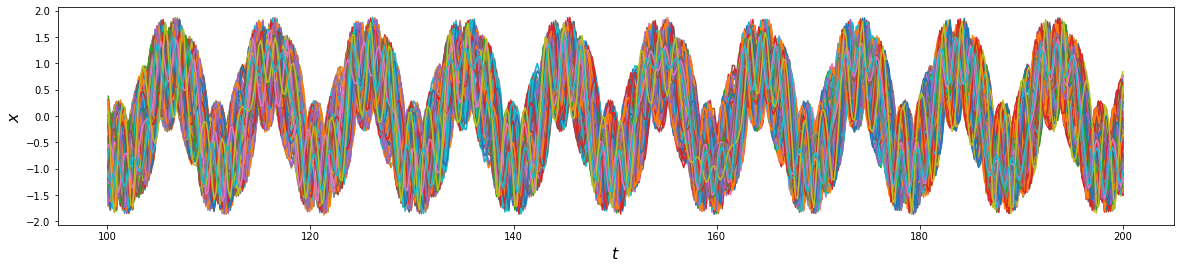

In [ ]:
plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(t[500:], x[500:,0], '-');

plt.xlabel('$t$', fontdict={'size':16});
plt.ylabel('$x$', fontdict={'size':16});

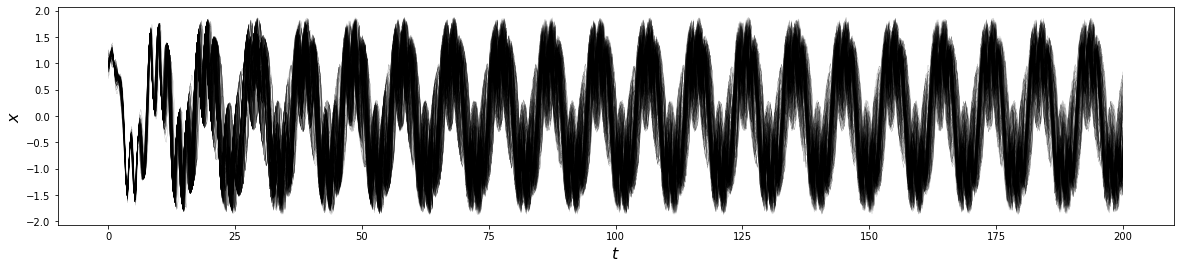

In [ ]:
plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(t, x[:,0], '-k', alpha=.5, lw=0.2);

plt.xlabel('$t$', fontdict={'size':16});
plt.ylabel('$x$', fontdict={'size':16});

Initial distribution (initial conditions)

\begin{eqnarray}
\begin{bmatrix}
x(0) \\
x'(0)
\end{bmatrix} + 
\begin{bmatrix}
\epsilon_0 \\
\epsilon_1
\end{bmatrix}
\end{eqnarray}

where $\epsilon_i \sim \mathcal{N}(0,\, 0.1^2)$

In [ ]:
import seaborn as sns

https://seaborn.pydata.org/

https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot

In [ ]:
samples

200

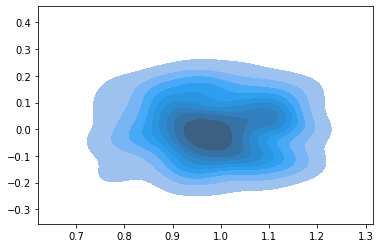

In [ ]:
x_initial = x0.reshape(-1,1) + 0.1*np.random.randn(2,samples)

sns.kdeplot(x=x_initial[0,:], y=x_initial[1,:], fill=True)

Forecast distribution

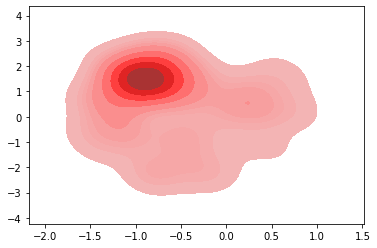

In [ ]:
x_final = np.zeros((samples,2));
for i in range(0, samples):
  x_final[i,:] = x_samples[i][-1,:];

sns.kdeplot(x=x_final[:,0], y=x_final[:,1], fill=True, color='red')

# Three solutions

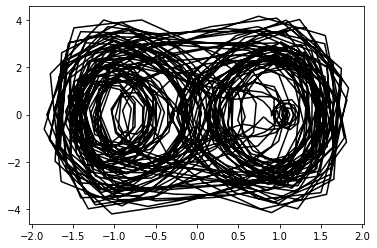

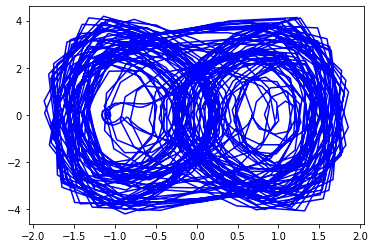

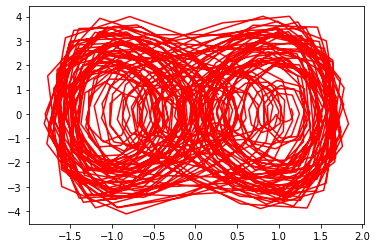

In [ ]:
plt.figure()
plt.plot(x_samples[0][:,0], x_samples[0][:,1], '-k');

plt.figure()
plt.plot(x_samples[100][:,0], x_samples[100][:,1], '-b');

plt.figure()
plt.plot(x_samples[150][:,0], x_samples[150][:,1], '-r');

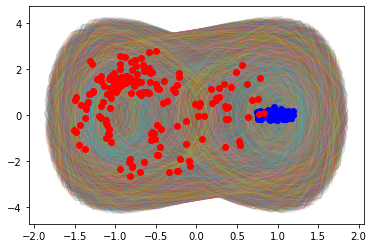

In [ ]:
#plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(x[:,0], x[:,1], '-', alpha=.5, lw=0.2);


plt.plot(x_initial[0,:], x_initial[1,:], 'ob', lw=1);
plt.plot(x_final[:,0], x_final[:,1], 'or', lw=1);

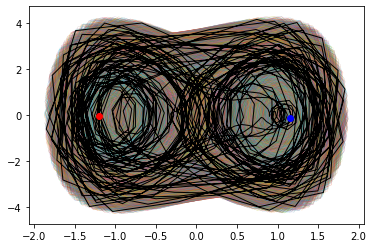

In [ ]:
#plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(x[:,0], x[:,1], '-', alpha=.5, lw=0.2);

plt.plot(x_samples[0][:,0], x_samples[0][:,1], '-k', lw=1);
plt.plot(x_initial[0,0], x_initial[1,0], 'ob', lw=1);
plt.plot(x_final[0,0], x_final[0,1], 'or', lw=1);

## Conclusions

1. We solve initial value problems in Python using `odeint`.

2. Small perturbations in the initial conditions can lead to significantly different final solutions due to the non-linear dynamics of the system.

3. The distribution of the forecast may not necessarily follow a normal distribution, as it can have multiple modes.